In [0]:
!pip install git+https://github.com/keras-team/keras-tuner.git

In [3]:
!pip install scipy==1.1.0
from google.colab import drive
drive.mount('/content/gdrive')
import pandas as pd
import numpy as np
from matplotlib import pyplot
import scipy.misc 
from math import sqrt 
import itertools
from IPython.display import display
%matplotlib inline

#Loading the dataset
data= pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/fer2013.csv')
data.head()

from pylab import rcParams
rcParams['figure.figsize'] = 15, 10

num_classes = 7
width = 48
height = 48

emotion_labels = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]
classes=np.array(("Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"))
# data.Usage.value_counts() 

# # 데이터 이미지 정답 보여주기
# depth = 1
# height = int(sqrt(len(data.pixels[0].split()))) 
# width = int(height)
# for i in range(0, 10): 
#     array = np.mat(data.pixels[i]).reshape(height, width) 
#     image = scipy.misc.toimage(array, cmin=0.0)
#     display(image)
#     print(emotion_labels[data.emotion[i]]) 

# 데이터 split. 
# 데이터 shape 

train_set = data[(data.Usage == 'Training')] 
val_set = data[(data.Usage == 'PublicTest')]
test_set = data[(data.Usage == 'PrivateTest')] 

X_train = np.array(list(map(str.split, train_set.pixels)), np.float32) 
X_val = np.array(list(map(str.split, val_set.pixels)), np.float32) 
X_test = np.array(list(map(str.split, test_set.pixels)), np.float32) 
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1) 
X_val = X_val.reshape(X_val.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

num_train = X_train.shape[0]
num_val = X_val.shape[0]
num_test = X_test.shape[0]

print(num_train,num_val,num_test)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print(X_train.dtype)
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator 

y_train = train_set.emotion 
y_train = np_utils.to_categorical(y_train, num_classes) 
y_val = val_set.emotion 
y_val = np_utils.to_categorical(y_val, num_classes) 
y_test = test_set.emotion 
y_test = np_utils.to_categorical(y_test, num_classes)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
28709 3589 3589
(28709, 48, 48, 1)
(3589, 48, 48, 1)
(3589, 48, 48, 1)
float32


Train on 22967 samples, validate on 5742 samples
Epoch 1/100
22967/22967 [==============================] - 3s 113us/sample - loss: 2.1640 - categorical_accuracy: 0.2080 - val_loss: 1.7890 - val_categorical_accuracy: 0.2914
Epoch 2/100
22967/22967 [==============================] - 2s 86us/sample - loss: 1.8344 - categorical_accuracy: 0.2824 - val_loss: 1.7361 - val_categorical_accuracy: 0.3149
Epoch 3/100
22967/22967 [==============================] - 2s 82us/sample - loss: 1.7376 - categorical_accuracy: 0.3130 - val_loss: 1.7251 - val_categorical_accuracy: 0.3191
Epoch 4/100
22967/22967 [==============================] - 2s 84us/sample - loss: 1.6903 - categorical_accuracy: 0.3316 - val_loss: 1.7254 - val_categorical_accuracy: 0.3009
Epoch 5/100
22967/22967 [==============================] - 2s 84us/sample - loss: 1.6699 - categorical_accuracy: 0.3356 - val_loss: 1.6713 - val_categorical_accuracy: 0.3471
Epoch 6/100
22967/22967 [==============================] - 2s 83us/sample - loss

NameError: ignored

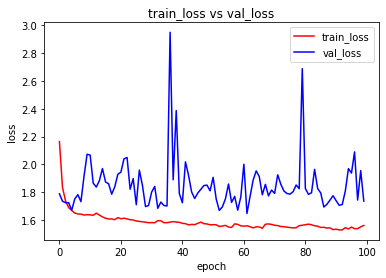

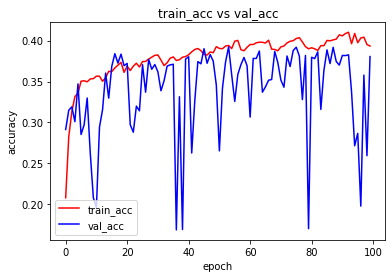

<Figure size 432x288 with 0 Axes>

In [0]:
import tensorflow
import kerastuner
from tensorflow.keras import datasets, Sequential, utils
from tensorflow.keras.layers import Flatten, Conv2D, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import models, layers, activations, initializers, losses, optimizers, metrics
import numpy as np
import matplotlib.pyplot as plt

X_train_r = X_train.reshape(28709,2304)

################ MODEL START ###################
model = models.Sequential() 
model.add(layers.Dense(input_dim=2304, units=768, activation='relu', kernel_initializer=initializers.he_uniform())) 
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.3))

################ HIDDEN L1 ###################
model.add(layers.Dense(input_dim=768, units=256, activation='relu', kernel_initializer=initializers.he_uniform()))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.3))

################ HIDDEN L2 ###################
model.add(layers.Dense(input_dim=256, units=64, activation='relu', kernel_initializer=initializers.he_uniform()))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.3))

################ HIDDEN L3 ###################
model.add(layers.Dense(input_dim=64, units=32, activation='relu', kernel_initializer=initializers.he_uniform()))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(rate=0.3))

################ OUT PUT ###################
model.add(layers.Dense(units=7, activation='softmax')) # 0~9 

model.compile(optimizer=optimizers.Adam(), 
              loss=losses.categorical_crossentropy, 
              metrics=[metrics.categorical_accuracy])

# 하이퍼 파라미터
# batch_size=100 , epoch=100 , split=0.2, Dropout=0.3
# Hidden layer 3층. unit : 768 > 256 > 64 > 32

### model run ###
history = model.fit(X_train_r, y_train, batch_size=100, epochs=100, validation_split=0.2) 

%matplotlib inline
print(history.history.keys())
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']

epochs = range(len(train_acc))

## ephoc 정확도 시각화 ##
plt.plot(epochs,train_loss,'r', label='train_loss')
plt.plot(epochs,val_loss,'b', label='val_loss')
plt.title('train_loss vs val_loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.figure()

plt.plot(epochs,train_acc,'r', label='train_acc')
plt.plot(epochs,val_acc,'b', label='val_acc')
plt.title('train_acc vs val_acc')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.figure()

In [0]:
from tensorflow import keras 
from tensorflow.keras import layers

import numpy as np

from kerastuner.tuners import RandomSearch
from kerastuner.engine.hypermodel import HyperModel
from kerastuner.engine.hyperparameters import HyperParameters


# 3) Select tuner and compile it
# Available tuners are RandomSearch and Hyperband. 

tuner = RandomSearch(
    model, 
    objective='val_categorical_accuracy', # objective function
    max_trials=3, 
    executions_per_trial=3, # number of models per trial
    directory='test_prac_dir',
    project_name='Emotion Detect')

tuner.search_space_summary()

# hp.Range('num_layers', 2, 20)
# layers.Dense(units=hp.Range('units_' + str(i), 32, 512, 32), activation='relu'))
# optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4]))